# Import Dataset

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


encoded_airline_survey = pd.read_csv('encoded_airline_survey.csv')
encoded_airline_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Flight Distance                    103904 non-null  int64
 2   Inflight wifi service              103904 non-null  int64
 3   Departure/Arrival time convenient  103904 non-null  int64
 4   Ease of Online booking             103904 non-null  int64
 5   Gate location                      103904 non-null  int64
 6   Food and drink                     103904 non-null  int64
 7   Online boarding                    103904 non-null  int64
 8   Seat comfort                       103904 non-null  int64
 9   Inflight entertainment             103904 non-null  int64
 10  On-board service                   103904 non-null  int64
 11  Leg room service                   103904 non-null  int64
 12  Ba

# Seperating Features and Target Variables

In [7]:
# Separate features (X) and target (y)
X = encoded_airline_survey.drop(columns=["satisfaction_Encoded"])
y = encoded_airline_survey["satisfaction_Encoded"]

# Check the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (103904, 22)
Target shape: (103904,)


# Data Split

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Check the sizes of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (83123, 22)
Test features shape: (20781, 22)
Training target shape: (83123,)
Test target shape: (20781,)


In [11]:
# Check class distribution in training and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
satisfaction_Encoded
0    0.567617
1    0.432383
Name: proportion, dtype: float64

Test set class distribution:
satisfaction_Encoded
0    0.56287
1    0.43713
Name: proportion, dtype: float64


# Machine Learning Algorithm

## Random Forest

## Base Model

In [13]:
# Train the random forest classifier
rf_untuned = RandomForestClassifier(random_state=2023, n_jobs=-1)
rf_untuned.fit(X_train, y_train)

# Predictions for train and test sets
y_train_pred = rf_untuned.predict(X_train)
y_test_pred = rf_untuned.predict(X_test)

# Train metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average="binary")
train_recall = recall_score(y_train, y_train_pred, average="binary")
train_f1 = f1_score(y_train, y_train_pred, average="binary")

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average="binary")
test_recall = recall_score(y_test, y_test_pred, average="binary")
test_f1 = f1_score(y_test, y_test_pred, average="binary")

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_accuracy, train_precision, train_recall, train_f1],
    "Test": [test_accuracy, test_precision, test_recall, test_f1]
})

# Display the metrics DataFrame
print(metrics_df)


      Metric  Train      Test
0   Accuracy    1.0  0.948029
1  Precision    1.0  0.973050
2     Recall    1.0  0.906209
3   F1 Score    1.0  0.938440


## Confusion Matrix

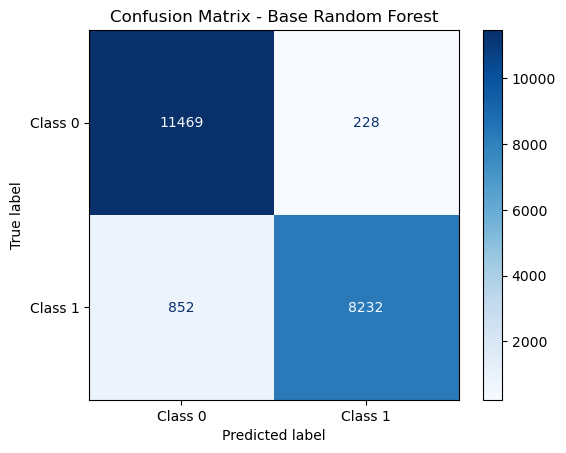

In [60]:
# Generate predictions for the test set
y_test_pred = rf_untuned.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Base Random Forest")
plt.show()


## Hyperparameter Tuning

### RandomizedSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
170 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 433, in fit
    raise Valu

{'n_estimators': 500,
 'min_samples_leaf': 2,
 'max_samples': None,
 'max_features': None,
 'max_depth': 9,
 'bootstrap': True}

### GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=450, stop=550, step=10),
    'bootstrap': [True],
    'max_features': [None],
    'max_samples': [None],
    'max_depth': [9],
    'min_samples_leaf': [2, 3, 4]    
}

grid = GridSearchCV(
    rf, 
    params,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': None,
 'max_samples': None,
 'min_samples_leaf': 2,
 'n_estimators': 470}

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the best model from GridSearchCV
best_rf = grid.best_estimator_

# Predictions for training and test datasets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Training Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary')  # Adjust 'binary' for multiclass
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_f1 = f1_score(y_train, y_train_pred, average='binary')

# Testing Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')  # Adjust 'binary' for multiclass
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Training Metrics:
Accuracy: 0.9373
Precision: 0.9592
Recall: 0.8930
F1 Score: 0.9249

Testing Metrics:
Accuracy: 0.9307
Precision: 0.9551
Recall: 0.8829
F1 Score: 0.9176


## Confusion Matrix

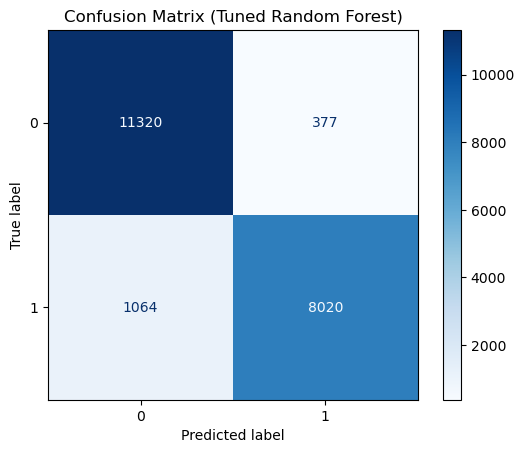

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the best model from GridSearchCV
best_rf = grid.best_estimator_

# Predict the test dataset
y_test_pred = best_rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.show()


## Feature Importance

Feature Importances:
                              Feature  Importance
7                     Online boarding    0.452118
19     Type of Travel_Personal Travel    0.186644
2               Inflight wifi service    0.142006
9              Inflight entertainment    0.053321
18    Customer Type_disloyal Customer    0.036734
13                    Checkin service    0.028479
20                          Class_Eco    0.016456
11                   Leg room service    0.015910
12                   Baggage handling    0.009254
8                        Seat comfort    0.008980
5                       Gate location    0.008140
14                   Inflight service    0.007899
0                                 Age    0.007502
1                     Flight Distance    0.006782
15                        Cleanliness    0.006587
10                   On-board service    0.005439
16         Departure Delay in Minutes    0.002667
4              Ease of Online booking    0.002017
3   Departure/Arrival time co

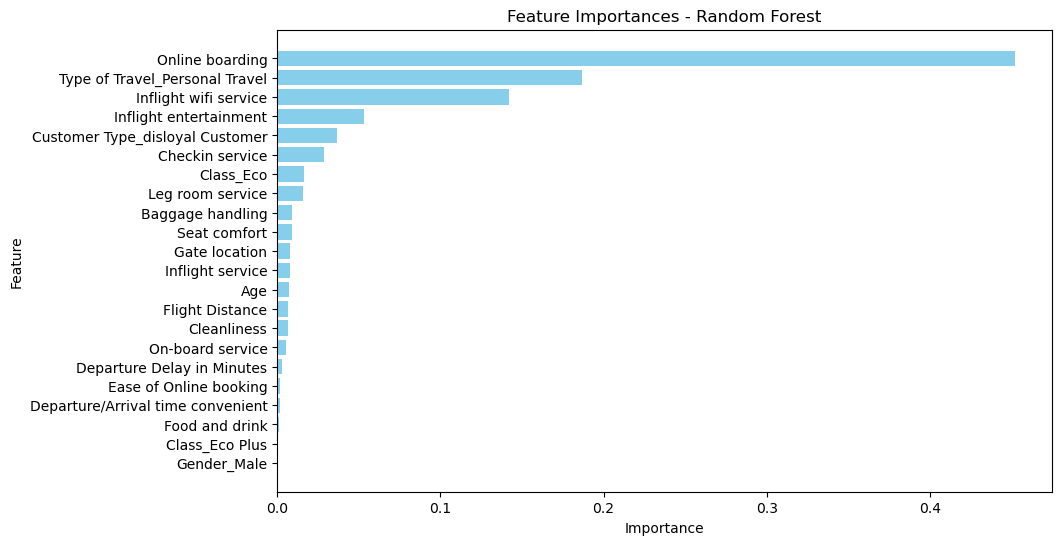

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the best Random Forest model
best_rf = grid.best_estimator_  # Tuned Random Forest
importances = best_rf.feature_importances_

# Create a DataFrame for features and their importance
features = X_train.columns  # Assuming X_train is a DataFrame with feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances - Random Forest")
plt.show()


## ROC Curve

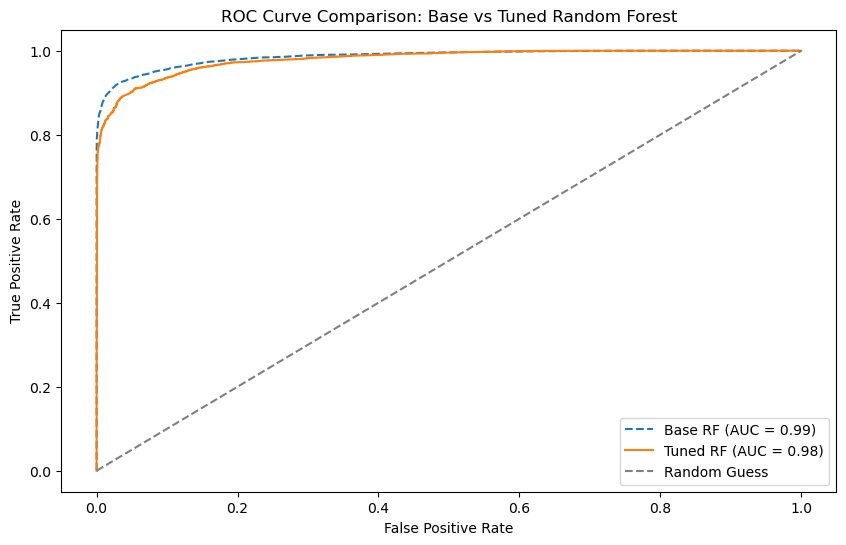

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure both base and tuned Random Forest models are fitted
base_rf = RandomForestClassifier(random_state=2023)  # Base Random Forest without tuning
base_rf.fit(X_train, y_train)

tuned_rf = grid.best_estimator_  # Tuned Random Forest from GridSearchCV

# Get probabilities for the positive class
base_probs = base_rf.predict_proba(X_test)[:, 1]  # Probabilities for base RF
tuned_probs = tuned_rf.predict_proba(X_test)[:, 1]  # Probabilities for tuned RF

# Calculate ROC curve and AUC for base RF
base_fpr, base_tpr, _ = roc_curve(y_test, base_probs)
base_auc = auc(base_fpr, base_tpr)

# Calculate ROC curve and AUC for tuned RF
tuned_fpr, tuned_tpr, _ = roc_curve(y_test, tuned_probs)
tuned_auc = auc(tuned_fpr, tuned_tpr)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(base_fpr, base_tpr, label=f"Base RF (AUC = {base_auc:.2f})", linestyle="--")
plt.plot(tuned_fpr, tuned_tpr, label=f"Tuned RF (AUC = {tuned_auc:.2f})", linestyle="-")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Base vs Tuned Random Forest")
plt.legend(loc="lower right")
plt.show()
